#Import all necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras import optimizers
from keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Preprocessing

In [ ]:
audio_data = pd.read_csv('/content/drive/MyDrive/CPE 313 - Advanced Machine Learning and Deep Learning/Final Project/Dataset/balanced_audio_mfcc_features.csv')
audio_data.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
0,-289.841064,49.991596,-18.256498,21.730635,-36.000229,0.606991,-16.290583,-14.626740,-11.316087,-19.515917,-2.984100,-5.968871,-5.707910,REAL
1,-258.080109,99.127060,-15.229312,23.251352,-3.010527,-5.174169,-13.836795,-18.071730,-2.004878,-7.679785,-8.139349,-11.516925,-18.677536,FAKE
2,-273.186523,62.883884,-9.446561,17.296957,-18.617285,-2.689151,-10.998062,-10.410206,-9.646523,-9.012032,-11.790571,1.415081,-4.423041,REAL
3,-339.015991,61.649944,4.997373,30.015635,2.700982,-17.875595,-19.440430,-3.649863,-4.792428,-7.441947,-8.753109,-15.827441,-1.996363,REAL
4,-306.657471,100.913376,-12.046065,33.799801,5.127544,2.096437,-4.653344,-22.345198,-2.365896,-1.587595,-5.497086,1.753966,-8.137715,REAL


In [ ]:
label_encoder = LabelEncoder()
audio_data['label'] = label_encoder.fit_transform(audio_data['label'])

audio_data.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
0,-289.841064,49.991596,-18.256498,21.730635,-36.000229,0.606991,-16.290583,-14.626740,-11.316087,-19.515917,-2.984100,-5.968871,-5.707910,1
1,-258.080109,99.127060,-15.229312,23.251352,-3.010527,-5.174169,-13.836795,-18.071730,-2.004878,-7.679785,-8.139349,-11.516925,-18.677536,0
2,-273.186523,62.883884,-9.446561,17.296957,-18.617285,-2.689151,-10.998062,-10.410206,-9.646523,-9.012032,-11.790571,1.415081,-4.423041,1
3,-339.015991,61.649944,4.997373,30.015635,2.700982,-17.875595,-19.440430,-3.649863,-4.792428,-7.441947,-8.753109,-15.827441,-1.996363,1
4,-306.657471,100.913376,-12.046065,33.799801,5.127544,2.096437,-4.653344,-22.345198,-2.365896,-1.587595,-5.497086,1.753966,-8.137715,1


In [ ]:
X = audio_data.drop('label', axis = 1)
y = audio_data['label']

In [ ]:
X.columns

Index(['mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13'],
      dtype='object')

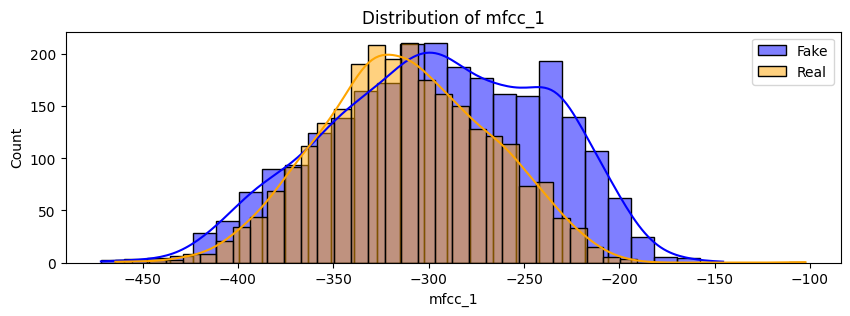

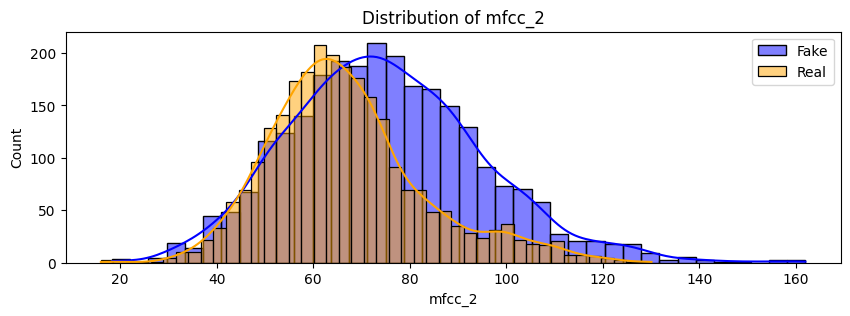

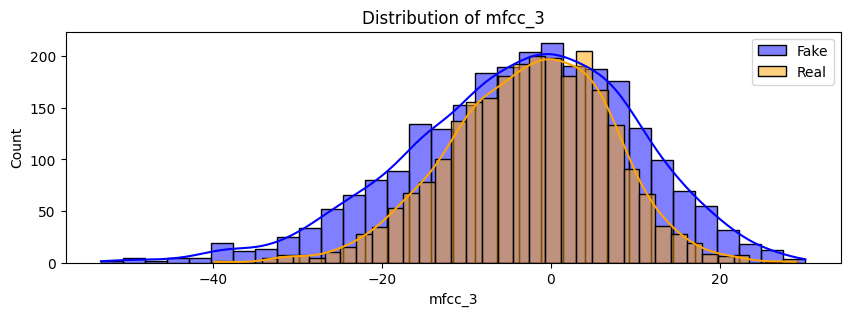

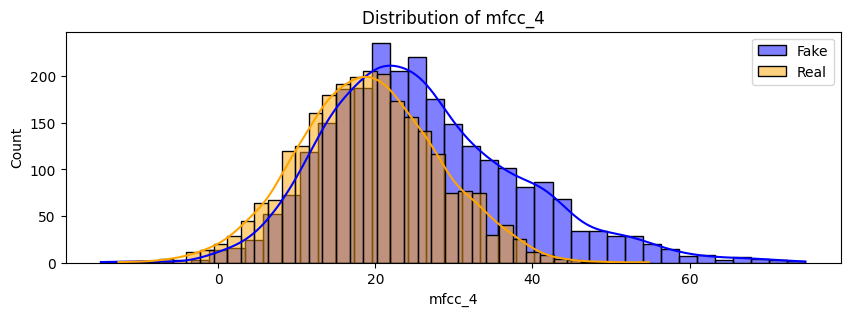

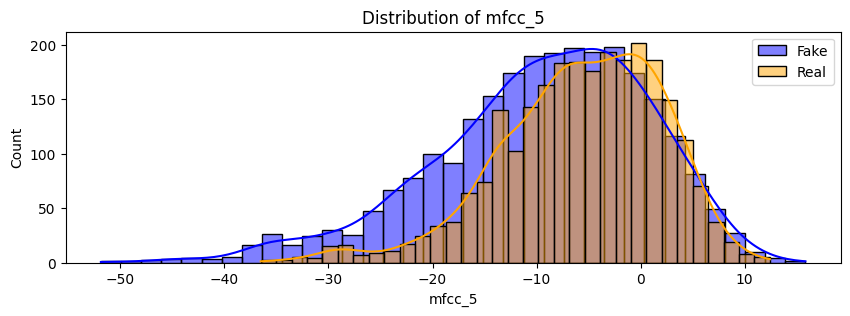

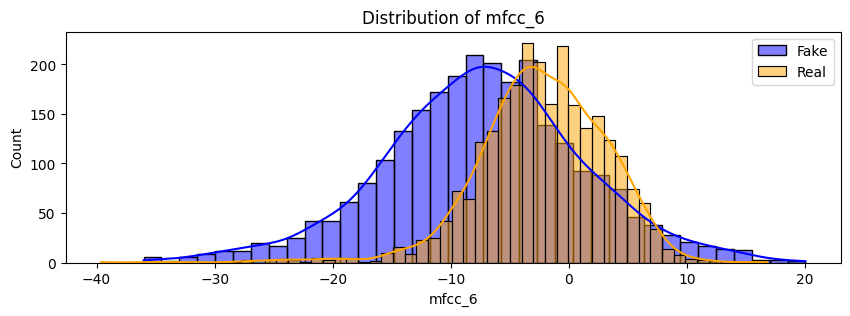

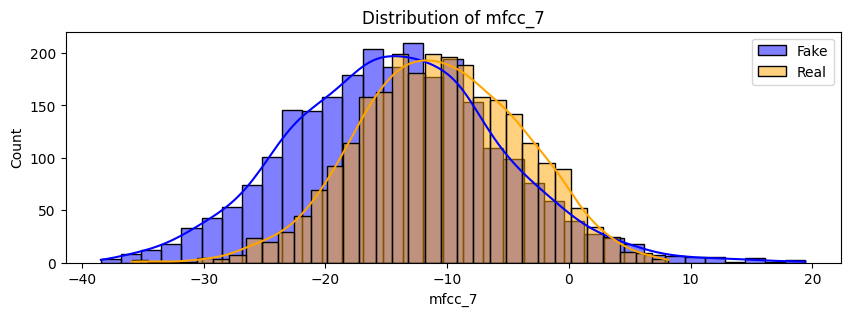

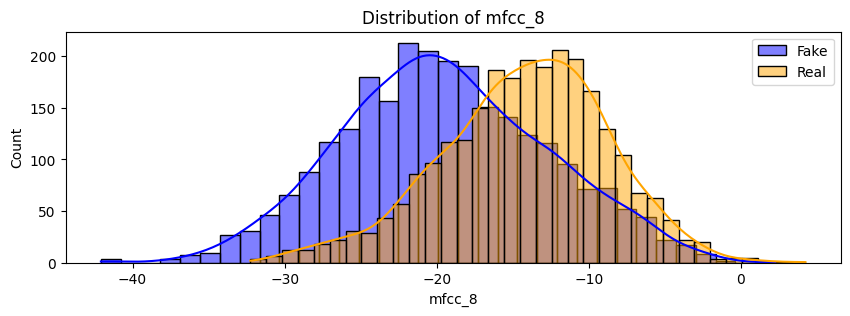

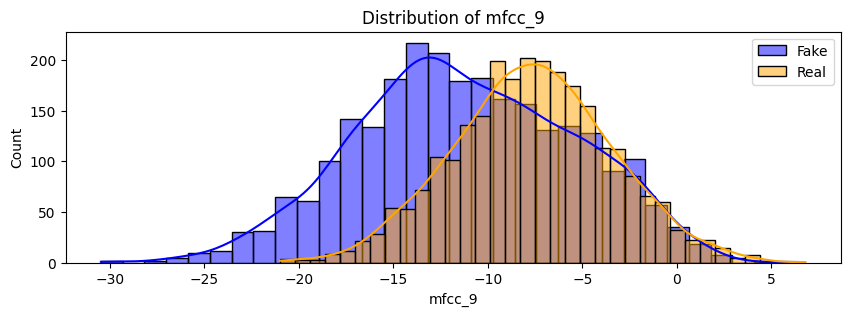

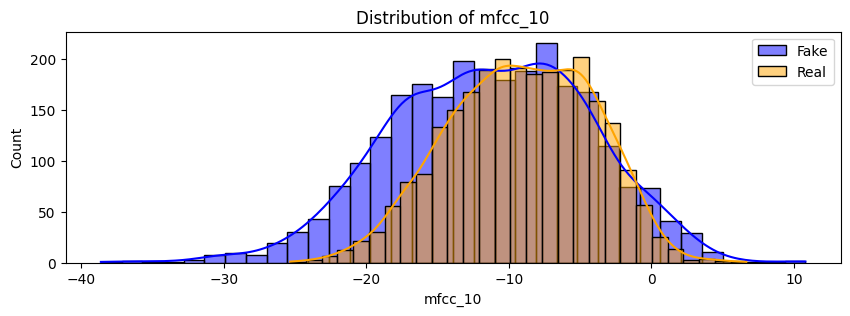

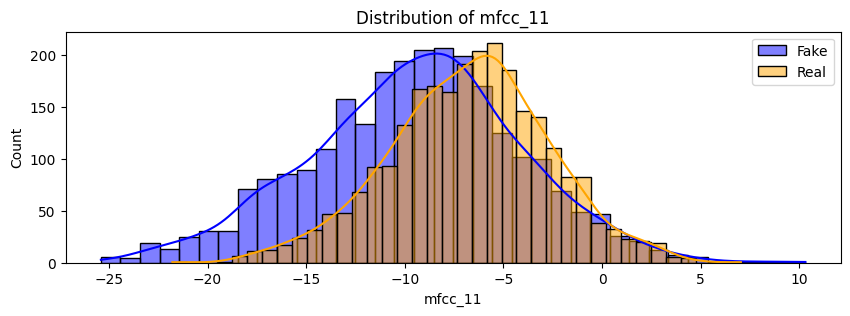

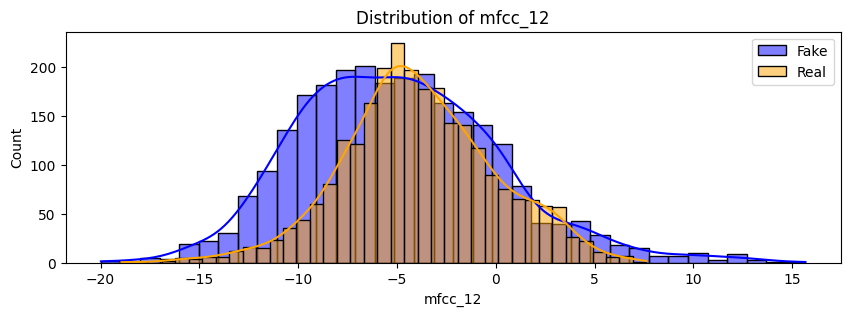

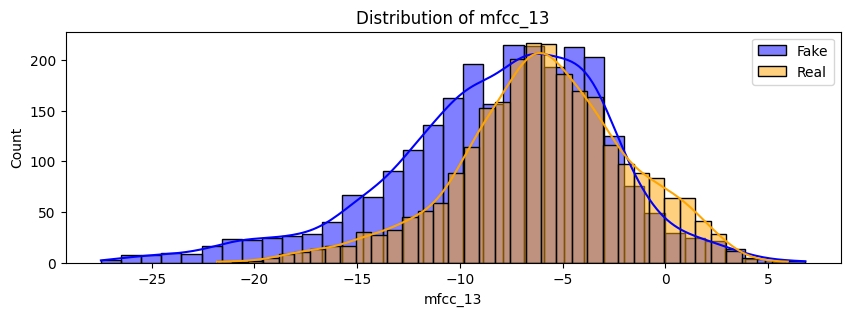

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
for column in X:
    plt.figure(figsize=(10, 3))
    sns.histplot(audio_data[audio_data['label'] == 0][column], kde=True, label='Fake', color='blue')
    sns.histplot(audio_data[audio_data['label'] == 1][column], kde=True, label='Real', color='orange')
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

#Train

In [ ]:
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True ,random_state=28)

In [ ]:
X_train.shape

(3870, 13)

In [ ]:
# Check the shape of X_train
print("Original shape of X_train:", X_train.shape)

# Initialize X_reshaped with the correct shape
n_samples = X_train.shape[0]
n_features = 13
n_mfcc_features = X_train.shape[1] // n_features

# Ensure X_train has the right number of features to be reshaped
if X_train.shape[1] % n_features != 0:
    raise ValueError("X_train cannot be evenly divided into the desired number of features.")

# Initialize the reshaped array
X_reshaped = np.zeros((n_samples, n_features, n_mfcc_features))

Original shape of X_train: (3870, 13)


In [ ]:
# Perform the reshaping
for i in range(n_features):
    X_reshaped[:, i, :] = X_train[:, i * n_mfcc_features:(i + 1) * n_mfcc_features]


y_reshaped = np.reshape(y_train, (y_train.shape[0], 1))

X_train = X_reshaped
y_train = y_reshaped

In [ ]:
print("Reshaped X_train shape:", X_train.shape)
print("Reshaped y_train shape:", y_train.shape)

Reshaped X_train shape: (3870, 13, 1)
Reshaped y_train shape: (3870, 1)


#LSTM

In [ ]:
lstm_model = Sequential()

lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
lstm_model.add(LSTM(64))

lstm_model.add(Dense(64, activation = 'relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(32 , activation = 'relu'))
lstm_model.add(Dropout(0.5))

lstm_model.add(Dense(1, activation = 'sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.0001)
lstm_model.compile(optimizer=optimizer, loss = BinaryCrossentropy(), metrics=['accuracy'])
lstm_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [ ]:
lstm_hist = lstm_model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
121/121 [==============================] - 9s 37ms/step - loss: 0.6853 - accuracy: 0.5501 - val_loss: 0.6507 - val_accuracy: 0.7326
Epoch 2/200
121/121 [==============================] - 3s 23ms/step - loss: 0.6258 - accuracy: 0.6739 - val_loss: 0.5458 - val_accuracy: 0.7504
Epoch 3/200
121/121 [==============================] - 2s 16ms/step - loss: 0.5541 - accuracy: 0.7297 - val_loss: 0.4907 - val_accuracy: 0.7721
Epoch 4/200
121/121 [==============================] - 2s 16ms/step - loss: 0.5367 - accuracy: 0.7494 - val_loss: 0.4733 - val_accuracy: 0.7736
Epoch 5/200
121/121 [==============================] - 2s 16ms/step - loss: 0.5048 - accuracy: 0.7607 - val_loss: 0.4584 - val_accuracy: 0.7860
Epoch 6/200
121/121 [==============================] - 2s 16ms/step - loss: 0.5033 - accuracy: 0.7581 - val_loss: 0.4538 - val_accuracy: 0.7884
Epoch 7/200
121/121 [==============================] - 2s 20ms/step - loss: 0.4891 - accuracy: 0.7690 - val_loss: 0.4459 - val_accuracy:

In [ ]:
test_loss, test_acc = lstm_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

41/41 [==============================] - 0s 5ms/step - loss: 0.2479 - accuracy: 0.9054
Test Loss: 0.2479344755411148
Test Accuracy: 0.9054263830184937


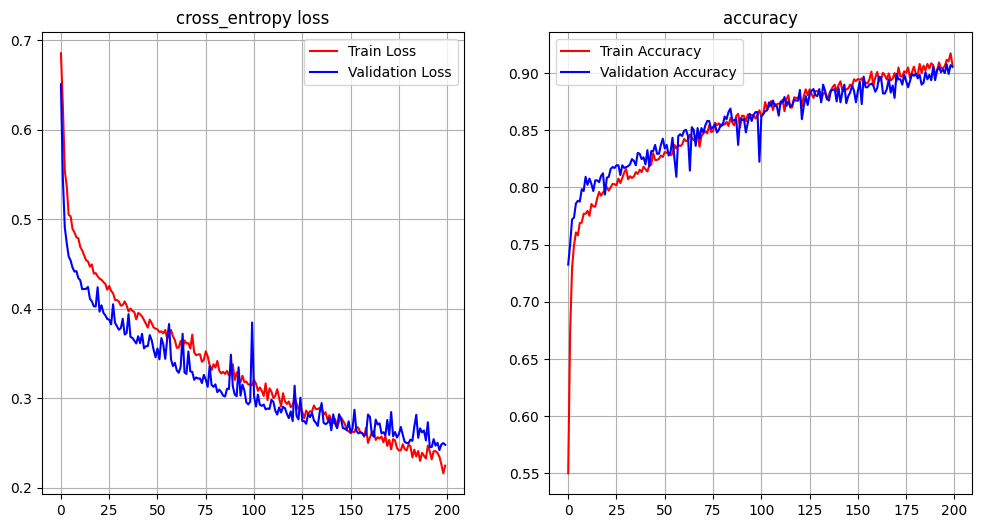

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(lstm_hist.history["loss"],'r-', label="Train Loss")
ax.plot(lstm_hist.history["val_loss"],'b-', label="Validation Loss")
ax.legend()
ax.set_title('cross_entropy loss')
ax.grid(True)


ax = fig.add_subplot(1, 2, 2)
ax.plot(lstm_hist.history["accuracy"],'r-', label="Train Accuracy")
ax.plot(lstm_hist.history["val_accuracy"],'b-', label="Validation Accuracy")
ax.legend()
ax.set_title('accuracy')
ax.grid(True)

41/41 [==============================] - 1s 5ms/step


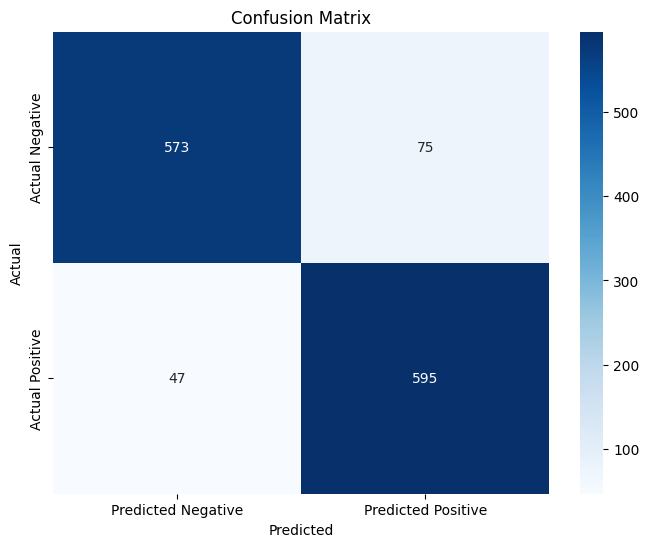

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = lstm_model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Evaluate LSTM model
lstm_eval = lstm_model.evaluate(X_test, y_test)
lstm_predictions = (lstm_model.predict(X_test) > 0.5).astype("int32")
print("LSTM Model Performance:")
print(classification_report(y_test, lstm_predictions))

41/41 [==============================] - 0s 6ms/step
LSTM Model Performance:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       648
           1       0.89      0.93      0.91       642

    accuracy                           0.91      1290
   macro avg       0.91      0.91      0.91      1290
weighted avg       0.91      0.91      0.91      1290



In [ ]:
lstm_model.save('new_LSTM.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#CNN

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

cnn_model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

optimizer = optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 32)             0         
 D)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 5, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 1, 64)            

In [ ]:
print(X_train.shape[2])

1


In [ ]:
cnn_hist = cnn_model.fit(X_train, y_train, epochs=1200, batch_size=32, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/1200
97/97 [==============================] - 2s 8ms/step - loss: 6.5146 - accuracy: 0.4758 - val_loss: 0.9915 - val_accuracy: 0.4522
Epoch 2/1200
97/97 [==============================] - 0s 5ms/step - loss: 4.2119 - accuracy: 0.4842 - val_loss: 0.7095 - val_accuracy: 0.5956
Epoch 3/1200
97/97 [==============================] - 1s 5ms/step - loss: 3.1332 - accuracy: 0.5039 - val_loss: 0.6585 - val_accuracy: 0.6124
Epoch 4/1200
97/97 [==============================] - 0s 5ms/step - loss: 2.4797 - accuracy: 0.5220 - val_loss: 0.6112 - val_accuracy: 0.6731
Epoch 5/1200
97/97 [==============================] - 1s 5ms/step - loss: 2.0883 - accuracy: 0.5165 - val_loss: 0.6121 - val_accuracy: 0.6680
Epoch 6/1200
97/97 [==============================] - 0s 4ms/step - loss: 1.6794 - accuracy: 0.5413 - val_loss: 0.6360 - val_accuracy: 0.6382
Epoch 7/1200
97/97 [==============================] - 0s 4ms/step - loss: 1.4897 - accuracy: 0.5523 - val_loss: 0.6579 - val_accuracy: 0.6240
Epoch 

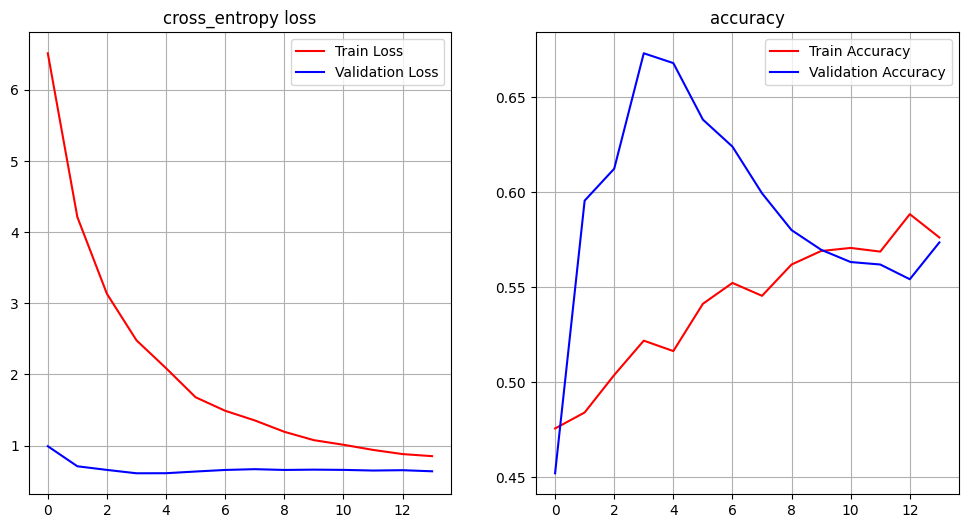

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(cnn_hist.history["loss"],'r-', label="Train Loss")
ax.plot(cnn_hist.history["val_loss"],'b-', label="Validation Loss")
ax.legend()
ax.set_title('cross_entropy loss')
ax.grid(True)


ax = fig.add_subplot(1, 2, 2)
ax.plot(cnn_hist.history["accuracy"],'r-', label="Train Accuracy")
ax.plot(cnn_hist.history["val_accuracy"],'b-', label="Validation Accuracy")
ax.legend()
ax.set_title('accuracy')
ax.grid(True)

41/41 [==============================] - 0s 1ms/step


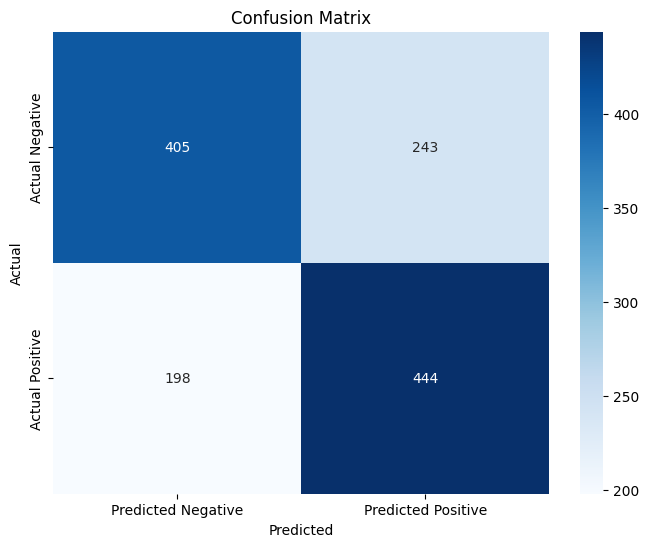

In [ ]:
y_pred = cnn_model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Evaluate CNN model
cnn_eval = cnn_model.predict(X_test)
cnn_predictions = (cnn_eval > 0.5).astype("int32")
print("CNN Model Performance:")
print(classification_report(y_test, y_pred_binary))

41/41 [==============================] - 0s 4ms/step
CNN Model Performance:
              precision    recall  f1-score   support

           0       0.67      0.62      0.65       648
           1       0.65      0.69      0.67       642

    accuracy                           0.66      1290
   macro avg       0.66      0.66      0.66      1290
weighted avg       0.66      0.66      0.66      1290



In [ ]:
cnn_model.save('cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#FCN

In [ ]:
fcn_model = Sequential([
        Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

fcn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
fcn_hist = fcn_model.fit(X_train, y_train, epochs=1200, batch_size=32, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/1200
97/97 [==============================] - 2s 7ms/step - loss: 4.4628 - accuracy: 0.5120 - val_loss: 0.6091 - val_accuracy: 0.6938
Epoch 2/1200
97/97 [==============================] - 0s 5ms/step - loss: 1.3125 - accuracy: 0.5439 - val_loss: 0.6519 - val_accuracy: 0.6783
Epoch 3/1200
97/97 [==============================] - 1s 6ms/step - loss: 0.9170 - accuracy: 0.5449 - val_loss: 0.6437 - val_accuracy: 0.6589
Epoch 4/1200
97/97 [==============================] - 1s 5ms/step - loss: 0.7254 - accuracy: 0.5785 - val_loss: 0.6416 - val_accuracy: 0.6731
Epoch 5/1200
97/97 [==============================] - 1s 6ms/step - loss: 0.7034 - accuracy: 0.5914 - val_loss: 0.6392 - val_accuracy: 0.6382
Epoch 6/1200
97/97 [==============================] - 1s 5ms/step - loss: 0.6645 - accuracy: 0.5969 - val_loss: 0.6344 - val_accuracy: 0.6473
Epoch 7/1200
97/97 [==============================] - 1s 5ms/step - loss: 0.6489 - accuracy: 0.6179 - val_loss: 0.6055 - val_accuracy: 0.7067
Epoch 

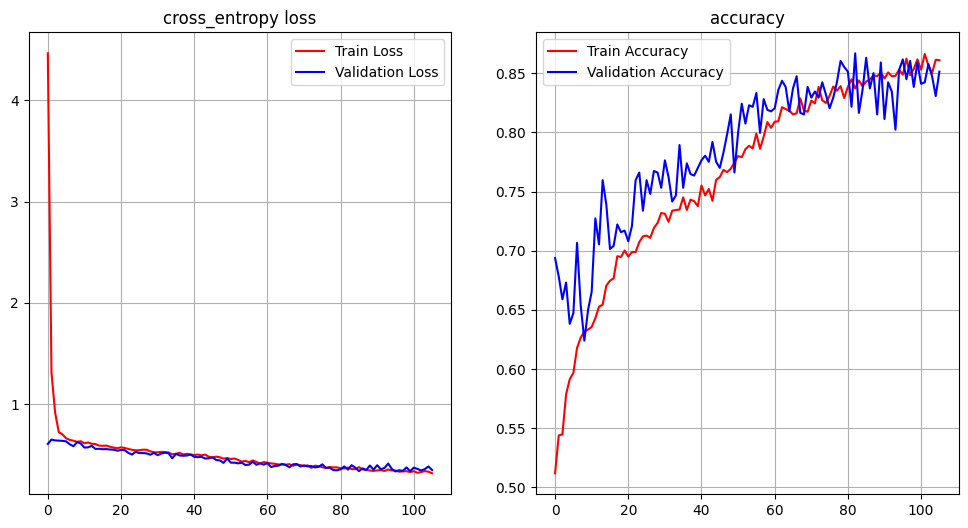

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(fcn_hist.history["loss"],'r-', label="Train Loss")
ax.plot(fcn_hist.history["val_loss"],'b-', label="Validation Loss")
ax.legend()
ax.set_title('cross_entropy loss')
ax.grid(True)


ax = fig.add_subplot(1, 2, 2)
ax.plot(fcn_hist.history["accuracy"],'r-', label="Train Accuracy")
ax.plot(fcn_hist.history["val_accuracy"],'b-', label="Validation Accuracy")
ax.legend()
ax.set_title('accuracy')
ax.grid(True)

41/41 [==============================] - 0s 1ms/step


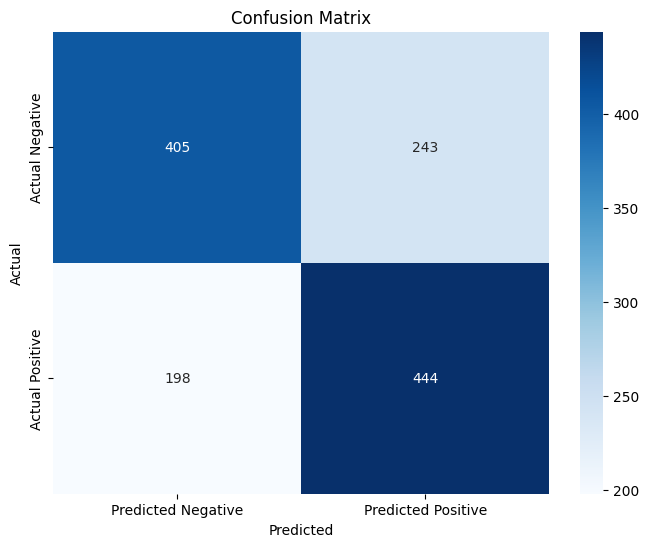

In [ ]:
y_pred = cnn_model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Evaluate FCN model
fcn_eval = fcn_model.evaluate(X_test, y_test)
fcn_predictions = (fcn_model.predict(X_test) > 0.5).astype("int32")
print("FCN Model Performance:")
print(classification_report(y_test, fcn_predictions))

41/41 [==============================] - 0s 2ms/step
FCN Model Performance:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       648
           1       0.82      0.94      0.88       642

    accuracy                           0.87      1290
   macro avg       0.88      0.87      0.87      1290
weighted avg       0.88      0.87      0.87      1290



In [ ]:
fcn_model.save('fcn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Predict

In [ ]:
import librosa
from keras.models import load_model


# Function to extract MFCC features from audio data
def extract_features(audio_data, sample_rate, n_mfcc=13):
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=n_mfcc)
    # Transpose MFCC features to have shape (n_mfcc, n_frames)
    mfccs = mfccs.T
    # Reshape MFCC features to have shape (n_frames, n_mfcc, 1)
    mfccs = mfccs.reshape(mfccs.shape[0], mfccs.shape[1], 1)
    return mfccs

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/CPE 313 - Advanced Machine Learning and Deep Learning/Final Project/model/new_LSTM.h5')
# Load the audio file
audio_file_path = '/content/drive/MyDrive/CPE 313 - Advanced Machine Learning and Deep Learning/Final Project/audio/human/human2.mp3'
audio_data, sample_rate = librosa.load(audio_file_path, sr=None)

# Preprocess the audio data
X_test = extract_features(audio_data, sample_rate)

# Make predictions
y_pred = model.predict(X_test)

# Aggregate the predictions
y_pred_mean = np.mean(y_pred)

y_pred_classes = (y_pred > 0.5).astype(int)

# Print the predicted probabilities and class
print(f"Predicted class probability: {y_pred}")
print(f"Predicted class: {'Real' if y_pred_classes[0] == 1 else 'Fake'}")

7/7 [==============================] - 3s 10ms/step
Predicted class probability: [[7.41617262e-01]
 [1.74665432e-02]
 [8.25705566e-03]
 [2.16018837e-02]
 [4.19566482e-02]
 [3.06949187e-02]
 [1.10265007e-02]
 [9.30734444e-03]
 [8.26961081e-03]
 [5.97173069e-03]
 [7.79148377e-03]
 [1.64113902e-02]
 [1.06191030e-02]
 [1.05606280e-02]
 [9.96943098e-03]
 [8.31921678e-03]
 [1.11514945e-02]
 [3.99989113e-02]
 [9.07318294e-02]
 [2.14152113e-02]
 [8.70409515e-03]
 [8.35279189e-03]
 [9.87994950e-03]
 [6.07564161e-03]
 [8.22066795e-03]
 [1.27890380e-02]
 [1.38805239e-02]
 [8.20670556e-03]
 [1.23336148e-02]
 [3.18997242e-02]
 [1.23371985e-02]
 [8.00067000e-03]
 [8.32266640e-03]
 [7.99733773e-03]
 [7.37418374e-03]
 [5.07515157e-03]
 [2.50533829e-03]
 [5.33286540e-04]
 [1.96846333e-04]
 [3.06212460e-04]
 [1.33696754e-04]
 [7.09892047e-05]
 [8.66813134e-05]
 [8.44960523e-05]
 [6.78871947e-05]
 [2.38834604e-04]
 [2.07816740e-03]
 [3.28550674e-03]
 [2.65217409e-03]
 [1.66507717e-03]
 [1.01585209e-03]
 

In [ ]:
import numpy as np
import pandas as pd
from keras.models import load_model
from sklearn.metrics import classification_report

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/CPE 313 - Advanced Machine Learning and Deep Learning/Final Project/model/new_LSTM.h5')

# Load MFCC features from CSV file
csv_file_path = '/content/drive/MyDrive/CPE 313 - Advanced Machine Learning and Deep Learning/Final Project/Dataset/balanced_eval_audio_features.csv'
data = pd.read_csv(csv_file_path)

# Remove the label column
X_test = data.drop(columns=['label']).values.astype('float32')  # Ensure data type is float32
y_true = data['label'].map({'REAL': 1, 'FAKE': 0})  # Convert true labels to integers

# Make predictions
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=['FAKE','REAL'])


# Print classification report
print(report)

460/460 [==============================] - 3s 5ms/step
              precision    recall  f1-score   support

        FAKE       0.84      0.76      0.80      7355
        REAL       0.78      0.85      0.82      7355

    accuracy                           0.81     14710
   macro avg       0.81      0.81      0.81     14710
weighted avg       0.81      0.81      0.81     14710



In [ ]:
import numpy as np
import pandas as pd
from keras.models import load_model
from sklearn.metrics import classification_report

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/CPE 313 - Advanced Machine Learning and Deep Learning/Final Project/model/cnn_model.h5')

# Load MFCC features from CSV file
csv_file_path = '/content/drive/MyDrive/CPE 313 - Advanced Machine Learning and Deep Learning/Final Project/Dataset/balanced_eval_audio_features.csv'
data = pd.read_csv(csv_file_path)

# Remove the label column
X_test = data.drop(columns=['label']).values.astype('float32')  # Ensure data type is float32
y_true = data['label'].map({'REAL': 1, 'FAKE': 0})  # Convert true labels to integers

# Make predictions
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=['FAKE','REAL'])


# Print classification report
print(report)

460/460 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

        FAKE       0.87      0.70      0.77      7355
        REAL       0.75      0.89      0.81      7355

    accuracy                           0.79     14710
   macro avg       0.81      0.79      0.79     14710
weighted avg       0.81      0.79      0.79     14710



In [ ]:
import numpy as np
import pandas as pd
from keras.models import load_model
from sklearn.metrics import classification_report

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/CPE 313 - Advanced Machine Learning and Deep Learning/Final Project/model/fcn_model.h5')

# Load MFCC features from CSV file
csv_file_path = '/content/drive/MyDrive/CPE 313 - Advanced Machine Learning and Deep Learning/Final Project/Dataset/balanced_eval_audio_features.csv'
data = pd.read_csv(csv_file_path)

# Remove the label column
X_test = data.drop(columns=['label']).values.astype('float32')  # Ensure data type is float32
y_true = data['label'].map({'REAL': 1, 'FAKE': 0})  # Convert true labels to integers

# Make predictions
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=['FAKE','REAL'])


# Print classification report
print(report)

460/460 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

        FAKE       0.85      0.72      0.78      7355
        REAL       0.76      0.88      0.81      7355

    accuracy                           0.80     14710
   macro avg       0.81      0.80      0.80     14710
weighted avg       0.81      0.80      0.80     14710

